**Objetivo: Tratar os dados de avaliação positiva e negativa para melhora do produto automaticamente sem precisar verificar um por um.**

*Bibliotecas: pandas, scikit-learn, wordcloud, matplotlib, nltk, unidecode*

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset_avaliacoes.csv')
df.head(5)

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento  
0   positivo  
1   negativo  
2   negativo  
3   positivo  
4   positivo

In [3]:
df.shape

(15501, 4)

In [4]:
#Mudar para 1 e 0
df.value_counts('sentimento')

sentimento
positivo    7890
negativo    7611
Name: count, dtype: int64

In [5]:
#Sentimento possitivo
df.avaliacao[0]

'Esse smartphone superou minhas expectativas, recomendo'

In [6]:
#Sentimento negativa
df.avaliacao[2]

'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.'

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Comprei um produto ótimo', 'Comprei um produto ruim']
vetorizar= CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [8]:
#sparse.from_spmatrix() para converter a matriz esparsa para o formato de dataframe. columns=vetorizar.get_feature_names_out() para capturar o nome das palavras. get_feature_names_out() serve para obter os nomes das palavras presentes na matriz.
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,columns=vetorizar.get_feature_names_out())
matriz_esparsa

comprei  produto  ruim  um  ótimo
0        1        1     0   1      1
1        1        1     1   1      0

Na primeira frase, "comprei" atribui o valor 1, pois a palavra está presente. "Produto" também recebe 1, enquanto "ruim" recebe 0, pois não está presente. Para "ótimo", o valor é 1. Na segunda frase, "comprei", "produto" e "ruim" recebem 1, enquanto "ótimo" recebe 0.

In [9]:
vetorizar = CountVectorizer(lowercase=False)#não mudar altomaticamente para lower ou upper
bag_of_words = vetorizar.fit_transform(df.avaliacao)
print(bag_of_words.shape)

(15501, 23352)


In [10]:
#Limitar featuers
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(df.avaliacao)
print(bag_of_words.shape)

(15501, 50)


In [11]:
matriz_esparsa_avaliacao = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
matriz_esparsa_avaliacao


Não  Produto  ainda  antes  as  até  bem  bom  chegou  com  ...  \
0        0        0      0      0   0    0    0    0       0    0  ...   
1        0        0      0      0   0    0    0    0       0    0  ...   
2        0        0      0      0   0    0    0    0       0    0  ...   
3        0        0      0      0   0    0    0    0       0    0  ...   
4        0        0      0      0   0    0    1    0       0    0  ...   
...    ...      ...    ...    ...  ..  ...  ...  ...     ...  ...  ...   
15496    0        0      0      0   0    0    0    0       0    0  ...   
15497    0        0      0      0   0    0    0    0       0    0  ...   
15498    0        0      0      0   0    0    0    0       0    0  ...   
15499    0        1      0      1   0    0    0    1       1    0  ...   
15500    0        0      0      0   0    0    0    0       0    0  ...   

       qualidade  que  recebi  recomendo  se  sem  tem  um  uma  veio  
0              0    0       0          1   0    0    0   0    0     0  
1              0    0       0          0   1    0    0   0    0     0  
2              0    0       0          0   0    0    0   0    0     0  
3              0    1       0          0   0    0    0   0    0     0  
4              1    2       0          0   0    0    0   0    0     0  
...          ...  ...     ...        ...  ..  ...  ...  ..  ...   ...  
15496          0    0       0          1   0    0    0   0    0     0  
15497          0    1       0          0   0    0    1   0    0     0  
15498          0    0       0          0   0    0    0   1    0     0  
15499          0    0       0          0   0    0    0   0    0     0  
15500          0    0       0          0   0    0    0   0    0     0  

[15501 rows x 50 columns]

*Esplicação resumida: A grande vantagem da técnica Bag of Words é sua simplicidade. Ela transforma textos em números, facilitando a análise e processamento por algoritmos de aprendizado de máquina. No entanto, a simplicidade também traz limitações: como o Bag of Words não considera a ordem das palavras, ele pode ignorar aspectos importantes do contexto e do significado do texto.*

**Dividos conjunto de dados**
- Dados de treinamento.
- Dados de teste/treino.

In [12]:
from sklearn.model_selection import train_test_split

#dados = colunas x= bag_of_words y=df dados aleatorios vou adicionar uma seed a mesma realizada no projeto de avaliaçoes de preços de casas: Sale_home
X_treino, X_teste, y_treino, y_teste= train_test_split(bag_of_words,df.sentimento,random_state=4978)

In [13]:
#Regreção logistica
from sklearn.linear_model import LogisticRegression

regrecao_logistica = LogisticRegression()
regrecao_logistica.fit(X_treino,y_treino)
acuracia = regrecao_logistica.score(X_teste,y_teste)#Saber acuracia do teste
print(acuracia)

0.7982456140350878


#TEntar aumentar a acuracia do modelo

In [14]:
#Nuvem de palavras, as palavras que mais se repetem, quanto maior a freq. de palavra maior vai ser a figura da imagem
from wordcloud import WordCloud

#Lista com avaliação
todas_palavras = [texto for texto in df.avaliacao]
todas_palavras

['Esse smartphone superou minhas expectativas, recomendo',
 'o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo..',
 'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.',
 'Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento.',
 'Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor .',
 'Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!!',
 'o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado',
 'já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen',
 'nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA 

In [ ]:
#Unico texto contendo tudo
todas_palavras = ' '.join([texto for texto in df.avaliacao])
print(todas_palavras)

Esse smartphone superou minhas expectativas, recomendo o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo.. Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra. Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento. Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor . Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!! o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA LOGISTICA. Ja solicitei o cancelam

In [16]:
#Gerando nuvem de palavras
nuvem_palavra = WordCloud().generate(todas_palavras)

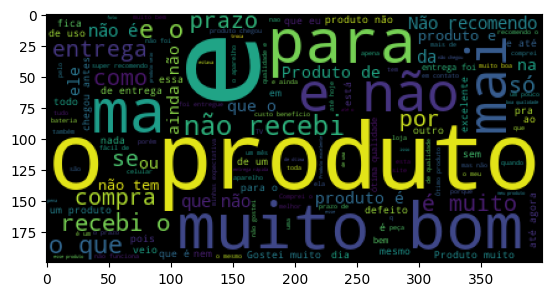

In [17]:
#Criando uma figura com matplotlib
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(nuvem_palavra)
plt.show()

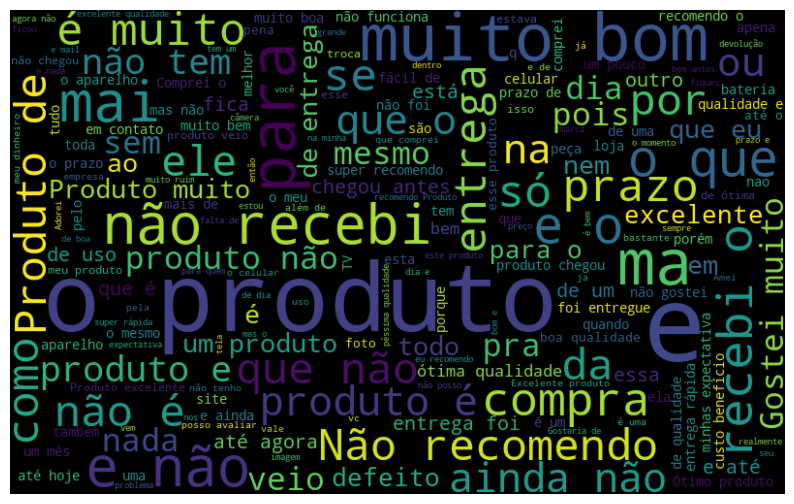

In [ ]:
#melhorasno a viwe
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_palavras)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')#Suavia imagem "bilinear"
plt.axis('off') #remover eixos (0-350: 0-175)
plt.show()

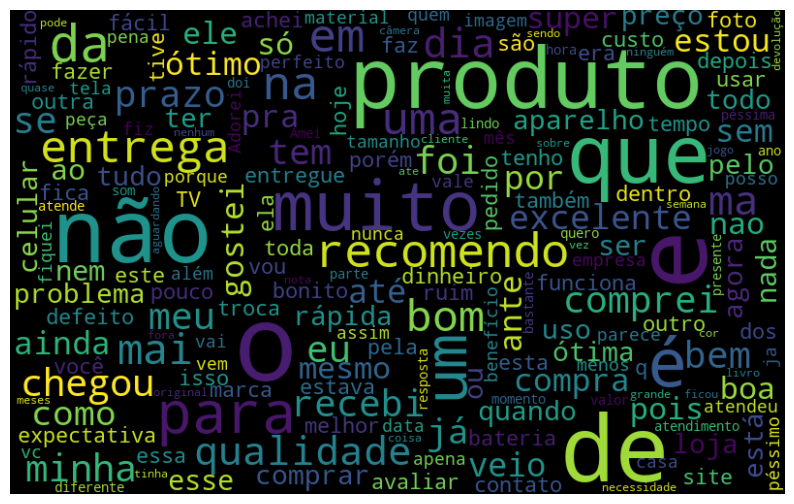

In [21]:
#TRatamento de forma individual
#melhorasno a viwe
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')#Suavia imagem "bilinear"
plt.axis('off') #remover eixos (0-350: 0-175)
plt.show()

*A imagem representa as palavras mais repetidas, no entanto e das 2 avaliações sendo as negativas e as positivas, agora separa as 2 informaçoes para ver o que mais aparece em cada tipo de avaliação*

In [22]:
#Criando função com filtro
def nuvem_palavra(texto, coluna_texto, sentimento):
    texto_sentimento = texto.query(f"sentimento == '{sentimento}'")[coluna_texto] #Separando avaliações pelo sentimento
    texto_unido = ' '.join(texto_sentimento)
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(texto_unido)
    #Uso do mesmo da fig
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')#Suavia imagem "bilinear"
    plt.axis('off') #remover eixos (0-350: 0-175)
    plt.show()

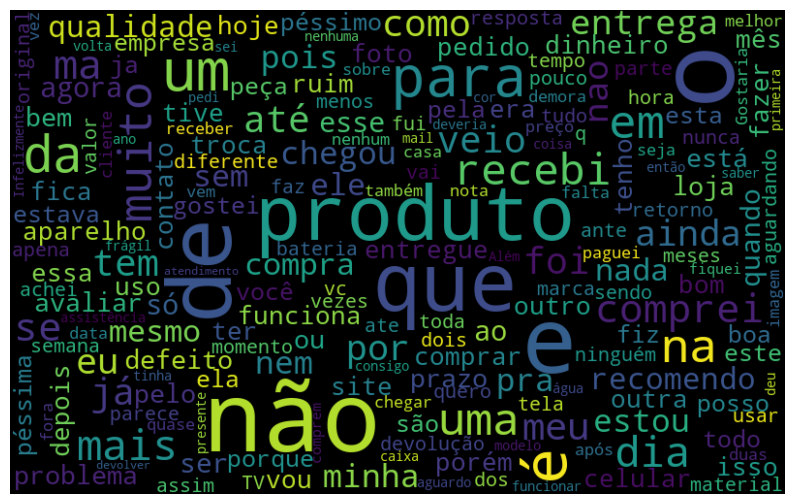

In [ ]:
#Negativo - palavras sobre qualidade, comunicação e devolução
nuvem_palavra(df, "avaliacao", "negativo")

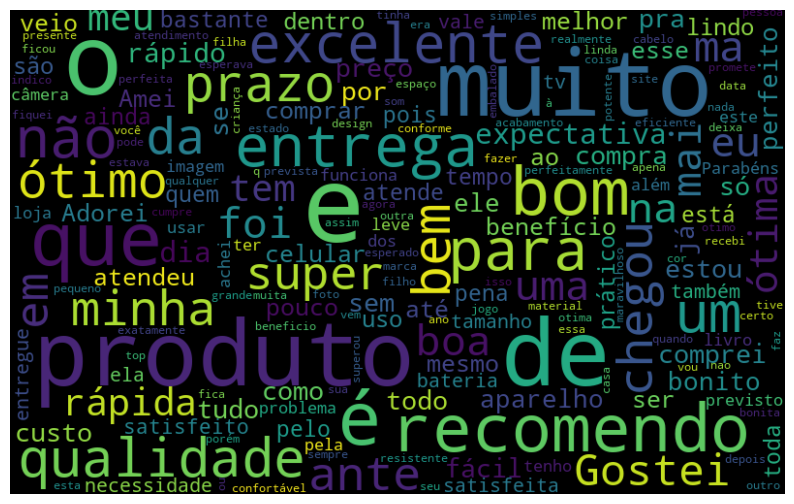

In [ ]:
#positivo - produto sem excelente, entrega, recomendado, qualidade
nuvem_palavra(df, "avaliacao", "positivo")

*Frequencia de palavras* Vai ser feita a tokenização ja aplicada em outro projetos

In [ ]:
#Comentei depois de rodar para visualização nao ficar muito grande no git
import nltk
#nltk.download('all')

In [27]:
frases = ['um produto bom', 'um produto ruim']
frequencia = nltk.FreqDist(frases)
frequencia

FreqDist({'um produto bom': 1, 'um produto ruim': 1})

In [ ]:
from nltk import tokenize
frase = 'O produto é excelente e a entrega foi muito rápida!'
#Separar quando tiver espaço, Pontuação vai ficar junto com a palavras
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['O', 'produto', 'é', 'excelente', 'e', 'a', 'entrega', 'foi', 'muito', 'rápida!']


**Obtendo frequencia**

In [30]:
token_frase =token_espaco.tokenize(todas_palavras)
#token_frase #Lista muito grandecomentar para nao ter precisar ver tudo

In [ ]:
#Resultado em um dicionario que vai ser passado como um DF
frequencia =nltk.FreqDist(token_frase)
frequencia

FreqDist({'e': 11813, 'o': 10865, 'de': 10280, 'a': 8873, 'que': 7657, 'não': 7286, 'é': 4786, 'produto': 4765, 'com': 4641, 'do': 4583, ...})

In [34]:
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),'Frequência': list(frequencia.values())})
df_frequencia.head(5)

Palavra  Frequência
0           Esse         101
1     smartphone          33
2        superou          90
3         minhas         533
4  expectativas,          79

In [35]:
#top 10 ordenado
df_frequencia.nlargest(columns="Frequência", n=10)

Palavra  Frequência
8          e       11813
6          o       10865
29        de       10280
19         a        8873
46       que        7657
22       não        7286
163        é        4786
63   produto        4765
177      com        4641
130       do        4583

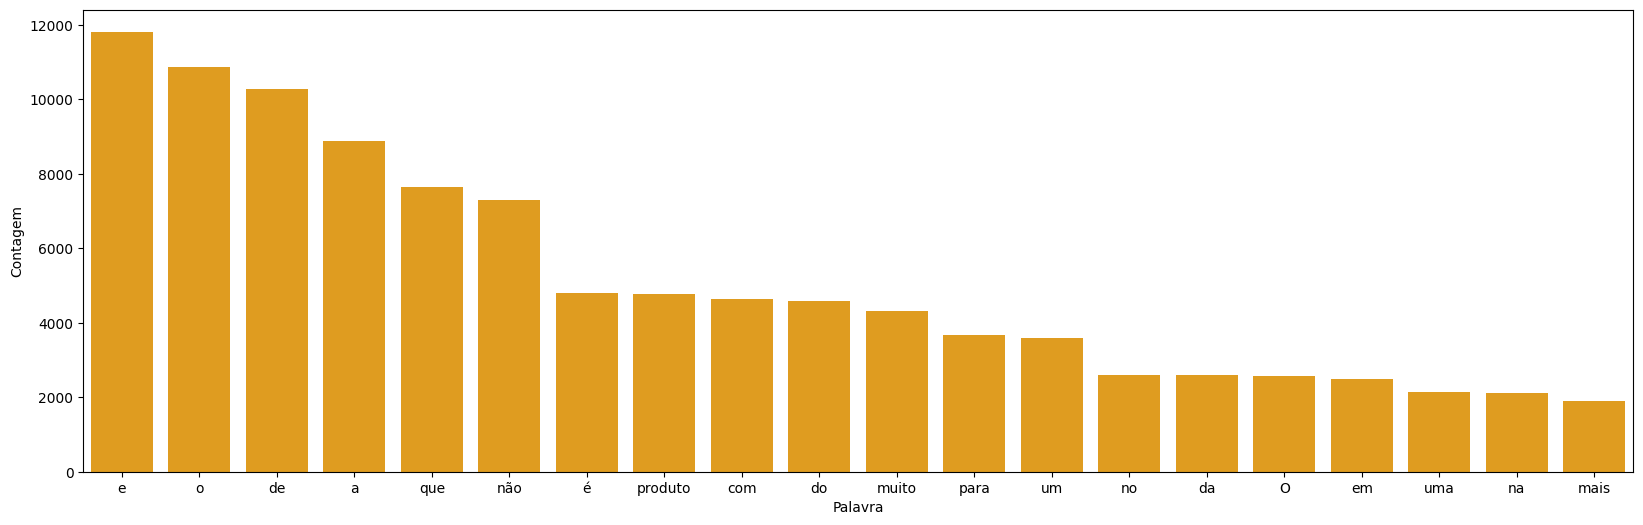

In [48]:
#grafico
import seaborn as sns

plt.figure(figsize=(20,6))
ax = sns.barplot(data=df_frequencia.nlargest(columns='Frequência', n=20), x='Palavra', y='Frequência', color="orange")
ax.set(ylabel='Contagem')
plt.show()

*Dados com baixo valor semantico ja que nao nos diz muita coisa então agora vou remover esses "a","e","o","de". next: Limpeza de dados*

In [ ]:
#Limpeza